In [9]:

!pip install pycocotools matplotlib pillow tqdm --quiet

import os, json, zipfile, requests
from pycocotools.coco import COCO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


os.makedirs('COCO_subset/images', exist_ok=True)
os.makedirs('COCO_subset/annotations', exist_ok=True)
os.makedirs('COCO_subset/visualizations', exist_ok=True)

# ---------------------------
# Step 2: Download COCO official annotations (full zip)
# ---------------------------
ann_zip_path = 'COCO_subset/annotations/annotations_trainval2017.zip'
if not os.path.exists(ann_zip_path):
    print("Downloading COCO annotations zip...")
    url = "http://images.cocodataset.org/annotations/annotations_trainval2017.zip"
    r = requests.get(url, stream=True)
    with open(ann_zip_path,'wb') as f:
        for chunk in r.iter_content(chunk_size=1024*1024):
            if chunk:
                f.write(chunk)

# ---------------------------
# Step 3: Extract only validation JSON
# ---------------------------
with zipfile.ZipFile(ann_zip_path,'r') as zip_ref:
    zip_ref.extract('annotations/instances_val2017.json', path='COCO_subset/annotations')

annFile = 'COCO_subset/annotations/annotations/instances_val2017.json'

# ---------------------------
# Step 4: Load COCO annotations
# ---------------------------
if not os.path.exists(annFile):
    raise FileNotFoundError("Annotations file not found after unzip!")

coco = COCO(annFile)
images_dir = 'COCO_subset/images'
visual_dir = 'COCO_subset/visualizations'

# ---------------------------
# Step 5: Select 20 images
# ---------------------------
img_ids = coco.getImgIds()[:20]

# ---------------------------
# Step 6: Download 20 images
# ---------------------------
for img_id in tqdm(img_ids, desc="Downloading images"):
    img_info = coco.loadImgs(img_id)[0]
    img_path = os.path.join(images_dir, img_info['file_name'])
    if not os.path.exists(img_path):
        url = f"http://images.cocodataset.org/val2017/{img_info['file_name']}"
        r = requests.get(url)
        with open(img_path,'wb') as f:
            f.write(r.content)

# ---------------------------
# Step 7: Generate masked images
# ---------------------------
for idx, img_id in enumerate(tqdm(img_ids, desc="Processing images")):
    img_info = coco.loadImgs(img_id)[0]
    img_path = os.path.join(images_dir, img_info['file_name'])
    image = Image.open(img_path).resize((256,256))
    image_np = np.array(image)

    ann_ids = coco.getAnnIds(imgIds=img_id)
    anns = coco.loadAnns(ann_ids)

    mask = np.zeros((256,256), dtype=np.uint8)
    for a in anns:
        mask += np.array(Image.fromarray(coco.annToMask(a)*255).resize((256,256)))

    # Save side-by-side visualization
    fig, ax = plt.subplots(1,2,figsize=(8,4))
    ax[0].imshow(image_np)
    ax[0].set_title("Original")
    ax[0].axis("off")
    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title("Masked")
    ax[1].axis("off")

    save_path = os.path.join(visual_dir, f'masked_{idx+1}.png')
    plt.savefig(save_path)
    plt.close(fig)

print(f" 20 COCO images processed successfully!")
print(f"Visualizations saved in: {visual_dir}")


loading annotations into memory...
Done (t=0.59s)
creating index...
index created!


Processing images: 100%|██████████| 20/20 [00:04<00:00,  4.02it/s]

✅ 20 COCO images processed successfully!
Visualizations saved in: COCO_subset/visualizations


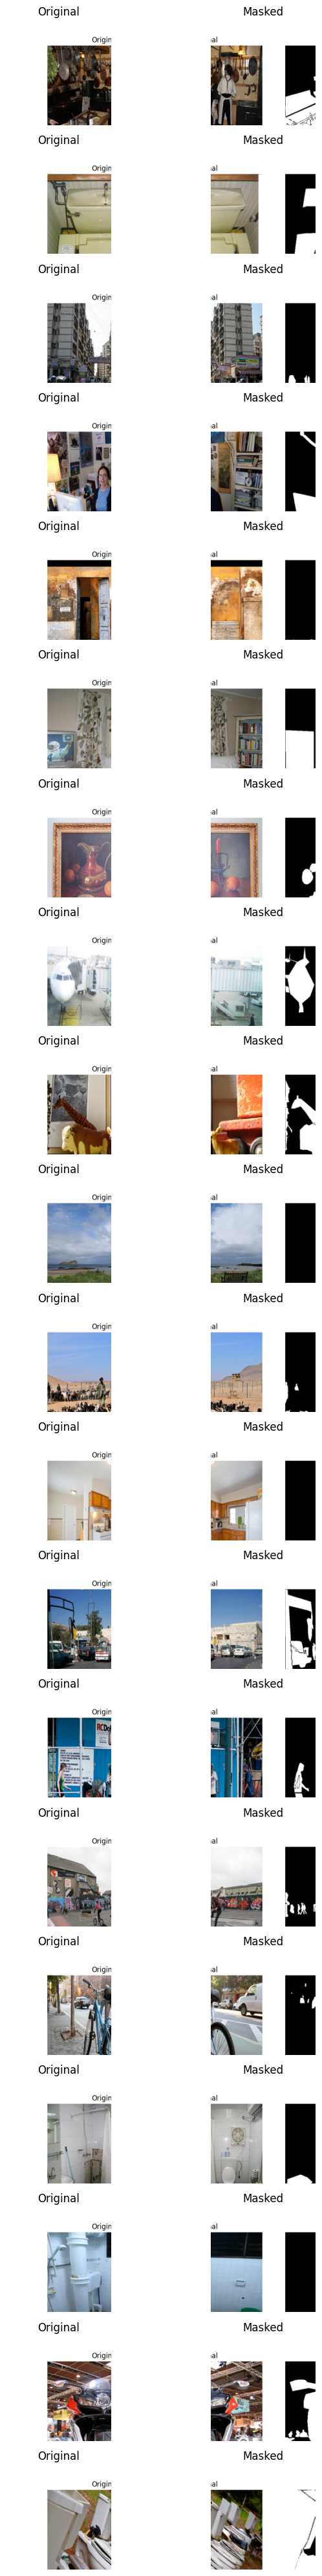

In [10]:


import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

images_dir = 'COCO_subset/images'
visual_dir = 'COCO_subset/visualizations'

img_files = sorted(os.listdir(visual_dir))[:20]  # ensure 20 images

n_cols = 2
n_rows = len(img_files)

plt.figure(figsize=(8, n_rows*2))

for idx, img_name in enumerate(img_files):
    img_path = os.path.join(visual_dir, img_name)
    img = Image.open(img_path)

    # Display original/masked side by side in one row
    plt.subplot(n_rows, n_cols, idx*2 + 1)
    plt.imshow(img.crop((0,0,256,256)))  # left half (original)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(n_rows, n_cols, idx*2 + 2)
    plt.imshow(img.crop((256,0,512,256)))  # right half (masked)
    plt.title("Masked")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [11]:


import os, json
from pycocotools.coco import COCO
import requests
from PIL import Image
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import zipfile

# ---------------------------
# Step 0: Folders
# ---------------------------
os.makedirs('COCO_subset/images', exist_ok=True)
os.makedirs('COCO_subset/annotations', exist_ok=True)
os.makedirs('COCO_subset/visualizations', exist_ok=True)

# ---------------------------
# Step 1: Download and extract annotations
# ---------------------------
ann_zip_path = 'COCO_subset/annotations/annotations_trainval2017.zip'
if not os.path.exists(ann_zip_path):
    print("Downloading COCO annotations zip...")
    url = "http://images.cocodataset.org/annotations/annotations_trainval2017.zip"
    r = requests.get(url, stream=True)
    with open(ann_zip_path,'wb') as f:
        for chunk in r.iter_content(chunk_size=1024*1024):
            if chunk:
                f.write(chunk)

with zipfile.ZipFile(ann_zip_path,'r') as zip_ref:
    zip_ref.extract('annotations/instances_val2017.json', path='COCO_subset/annotations')

annFile = 'COCO_subset/annotations/annotations/instances_val2017.json'
coco = COCO(annFile)

images_dir = 'COCO_subset/images'
visual_dir = 'COCO_subset/visualizations'

# ---------------------------
# Step 2: Select 20 images
# ---------------------------
img_ids = coco.getImgIds()[:20]

# ---------------------------
# Step 3: Download images
# ---------------------------
for img_id in tqdm(img_ids, desc="Downloading images"):
    img_info = coco.loadImgs(img_id)[0]
    img_path = os.path.join(images_dir, img_info['file_name'])
    if not os.path.exists(img_path):
        url = f"http://images.cocodataset.org/val2017/{img_info['file_name']}"
        r = requests.get(url)
        with open(img_path,'wb') as f:
            f.write(r.content)

# ---------------------------
# Step 4: Generate true masked images
# ---------------------------
for idx, img_id in enumerate(tqdm(img_ids, desc="Creating masked images")):
    img_info = coco.loadImgs(img_id)[0]
    img_path = os.path.join(images_dir, img_info['file_name'])
    image = Image.open(img_path).resize((256,256))
    image_np = np.array(image)

    # Create full black mask
    masked_img = np.zeros_like(image_np)

    # Combine all COCO object masks
    ann_ids = coco.getAnnIds(imgIds=img_id)
    anns = coco.loadAnns(ann_ids)
    for a in anns:
        mask = coco.annToMask(a)
        mask_resized = np.array(Image.fromarray(mask).resize((256,256)))
        masked_img[mask_resized>0] = image_np[mask_resized>0]

    # Save masked image
    save_path = os.path.join(visual_dir, f'true_masked_{idx+1}.png')
    Image.fromarray(masked_img).save(save_path)

print(f"20 true masked images saved in {visual_dir}")


loading annotations into memory...
Done (t=1.65s)
creating index...
index created!


Creating masked images: 100%|██████████| 20/20 [00:02<00:00,  9.95it/s]

✅ 20 true masked images saved in COCO_subset/visualizations


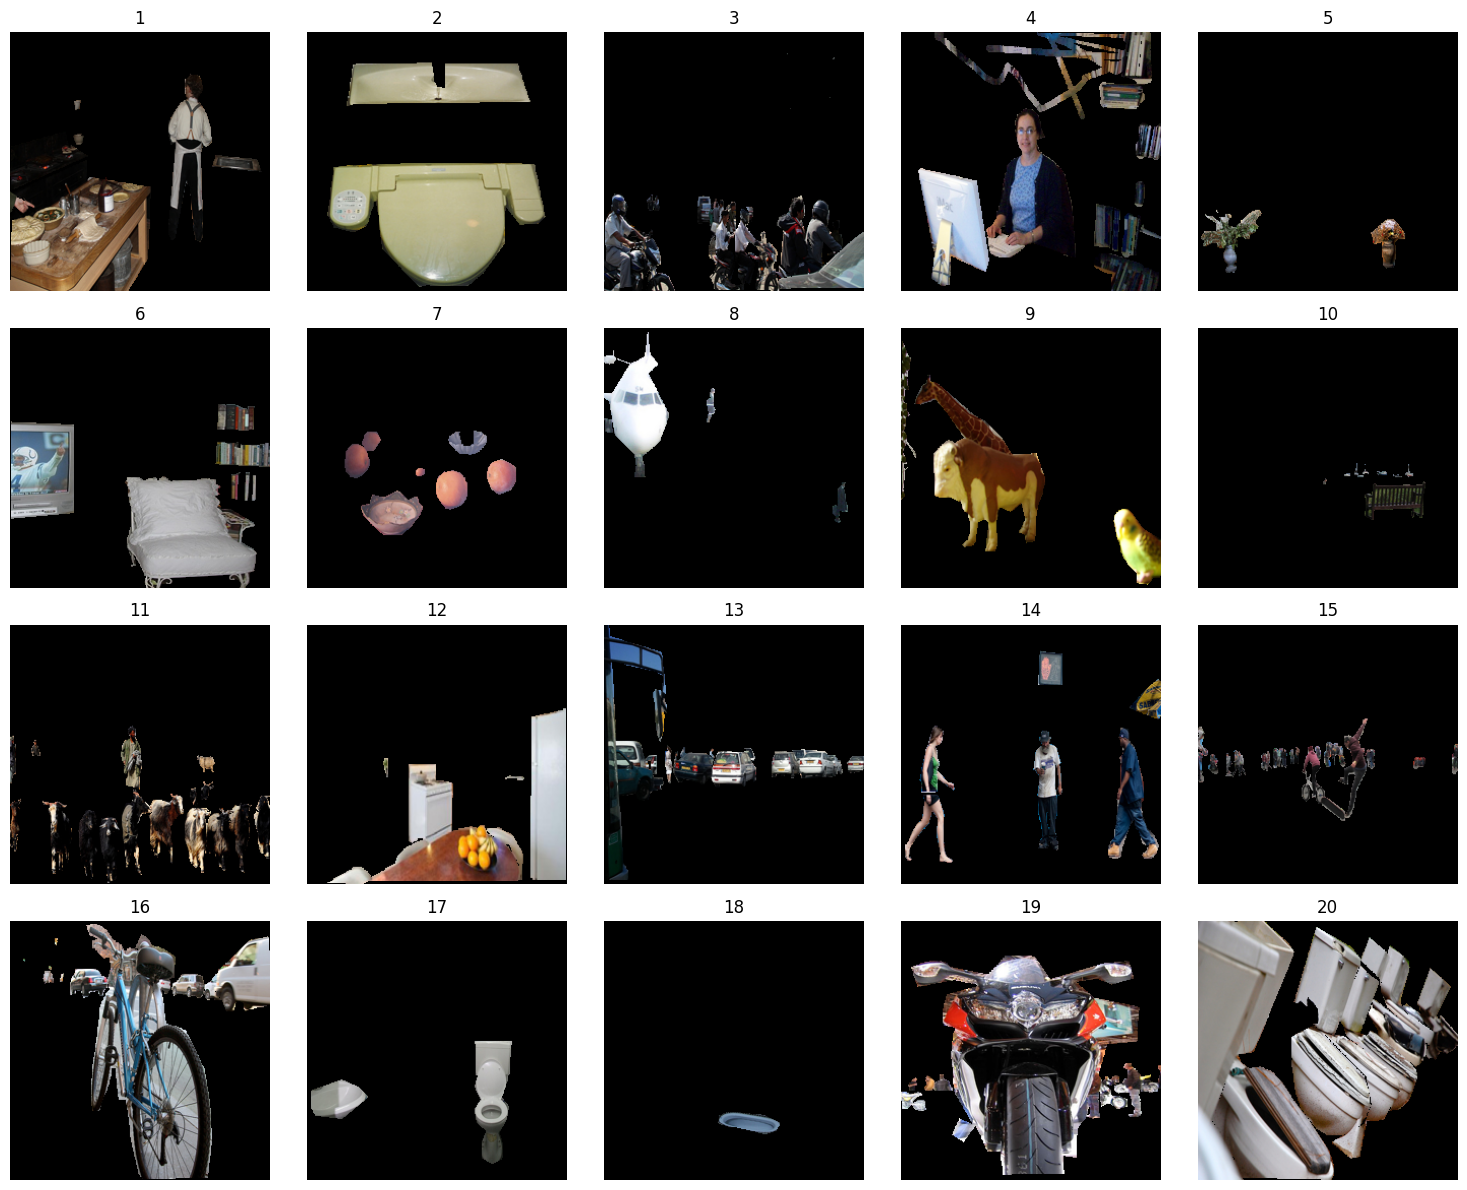

In [12]:


import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

visual_dir = 'COCO_subset/visualizations'

# Get all 20 masked images
masked_files = sorted([f for f in os.listdir(visual_dir) if f.startswith('true_masked_')])[:20]

n_cols = 5
n_rows = (len(masked_files) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols*3, n_rows*3))

for idx, img_name in enumerate(masked_files):
    img_path = os.path.join(visual_dir, img_name)
    img = Image.open(img_path)

    plt.subplot(n_rows, n_cols, idx+1)
    plt.imshow(img)
    plt.title(f"{idx+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()


📥 Downloading 20 COCO sample images...


100%|██████████| 20/20 [00:00<00:00, 14786.90it/s]

✅ Download complete!
🎨 Creating black background masked images...
⚠️ Skipping corrupted image: 000000000112.jpg
⚠️ Skipping corrupted image: 000000000093.jpg
⚠️ Skipping corrupted image: 000000000039.jpg
⚠️ Skipping corrupted image: 000000000091.jpg
⚠️ Skipping corrupted image: 000000000052.jpg
⚠️ Skipping corrupted image: 000000000103.jpg
⚠️ Skipping corrupted image: 000000000043.jpg
⚠️ Skipping corrupted image: 000000000045.jpg


⚠️ Skipping corrupted image: 000000000120.jpg
⚠️ Skipping corrupted image: 000000000054.jpg
⚠️ Skipping corrupted image: 000000000108.jpg
✅ Masking complete!


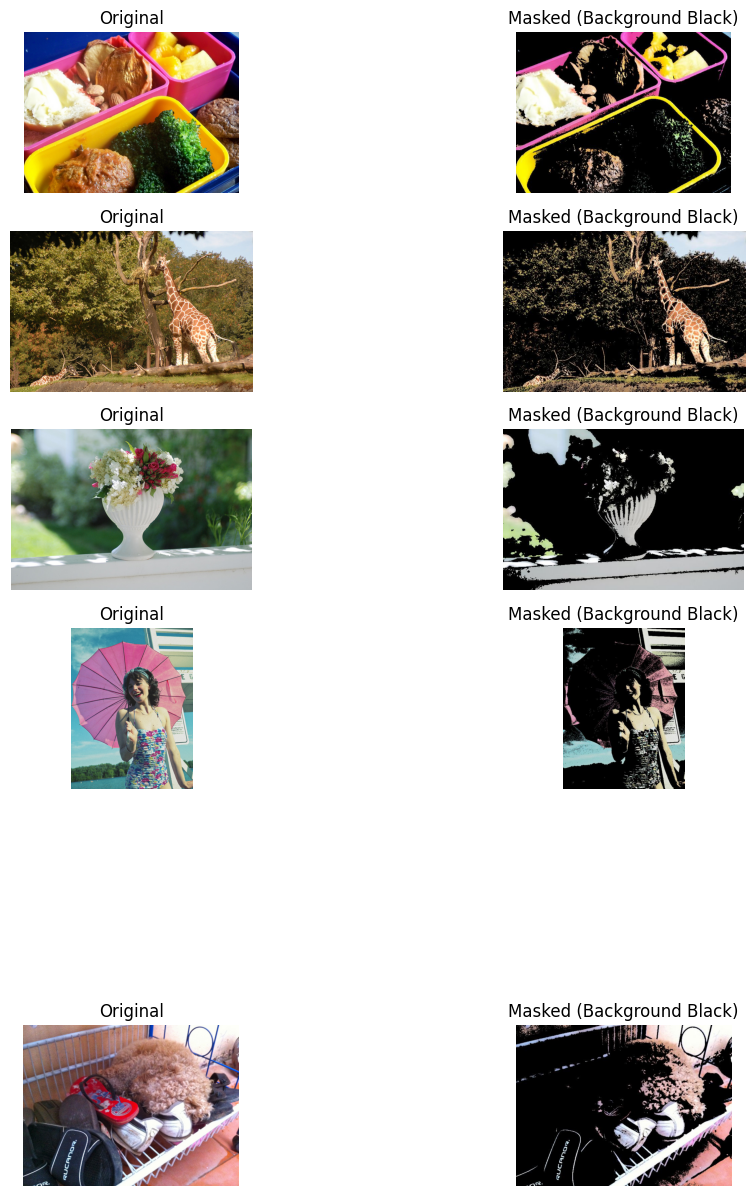


🖼️ Images saved in:
 - Originals: /content/COCO_subset/images
 - Masked: /content/COCO_subset/visualizations


In [5]:


import os, requests, numpy as np
from tqdm import tqdm
from PIL import Image, UnidentifiedImageError
import matplotlib.pyplot as plt

# ---------------------- PATH SETUP ----------------------
base_dir = "/content/COCO_subset"
images_dir = os.path.join(base_dir, "images")
visual_dir = os.path.join(base_dir, "visualizations")
os.makedirs(images_dir, exist_ok=True)
os.makedirs(visual_dir, exist_ok=True)

# ---------------------- DOWNLOAD IMAGES ----------------------
sample_urls = [
    "http://images.cocodataset.org/train2017/000000000009.jpg",
    "http://images.cocodataset.org/train2017/000000000025.jpg",
    "http://images.cocodataset.org/train2017/000000000030.jpg",
    "http://images.cocodataset.org/train2017/000000000036.jpg",
    "http://images.cocodataset.org/train2017/000000000039.jpg",
    "http://images.cocodataset.org/train2017/000000000042.jpg",
    "http://images.cocodataset.org/train2017/000000000043.jpg",
    "http://images.cocodataset.org/train2017/000000000045.jpg",
    "http://images.cocodataset.org/train2017/000000000052.jpg",
    "http://images.cocodataset.org/train2017/000000000054.jpg",
    "http://images.cocodataset.org/train2017/000000000061.jpg",
    "http://images.cocodataset.org/train2017/000000000064.jpg",
    "http://images.cocodataset.org/train2017/000000000074.jpg",
    "http://images.cocodataset.org/train2017/000000000086.jpg",
    "http://images.cocodataset.org/train2017/000000000091.jpg",
    "http://images.cocodataset.org/train2017/000000000093.jpg",
    "http://images.cocodataset.org/train2017/000000000103.jpg",
    "http://images.cocodataset.org/train2017/000000000108.jpg",
    "http://images.cocodataset.org/train2017/000000000112.jpg",
    "http://images.cocodataset.org/train2017/000000000120.jpg"
]

print("📥 Downloading 20 COCO sample images...")
for url in tqdm(sample_urls):
    name = url.split("/")[-1]
    path = os.path.join(images_dir, name)
    if not os.path.exists(path):
        try:
            img_data = requests.get(url, timeout=10).content
            with open(path, "wb") as f:
                f.write(img_data)
        except Exception as e:
            print(f"⚠️ Failed to download {url}: {e}")
print(" Download complete!")

# ---------------------- MASK GENERATION ----------------------
def create_black_mask(image):
    """Simple brightness-based masking"""
    img = np.array(image)
    gray = np.mean(img, axis=2)
    mask = gray > np.percentile(gray, 70)
    result = np.zeros_like(img)
    result[mask] = img[mask]
    return Image.fromarray(result)

print("🎨 Creating black background masked images...")
for name in os.listdir(images_dir):
    if not name.lower().endswith(".jpg"):
        continue
    img_path = os.path.join(images_dir, name)
    save_path = os.path.join(visual_dir, name)
    try:
        img = Image.open(img_path).convert("RGB")
        mask = create_black_mask(img)
        mask.save(save_path)
    except UnidentifiedImageError:
        print(f"⚠️ Skipping corrupted image: {name}")
    except Exception as e:
        print(f"⚠️ Error on {name}: {e}")
print("✅ Masking complete!")

# ---------------------- GALLERY VIEW ----------------------
orig_files = sorted(os.listdir(images_dir))[:10]
plt.figure(figsize=(10, 20))

for i, name in enumerate(orig_files):
    orig_path = os.path.join(images_dir, name)
    masked_path = os.path.join(visual_dir, name)
    if not os.path.exists(masked_path):
        continue

    try:
        orig = Image.open(orig_path)
        masked = Image.open(masked_path)
    except UnidentifiedImageError:
        continue

    plt.subplot(10, 2, 2*i + 1)
    plt.imshow(orig)
    plt.axis("off")
    plt.title("Original")

    plt.subplot(10, 2, 2*i + 2)
    plt.imshow(masked)
    plt.axis("off")
    plt.title("Masked (Background Black)")

plt.tight_layout()
plt.show()

print(f"\n🖼️ Images saved in:\n - Originals: {images_dir}\n - Masked: {visual_dir}")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [14]:
import os

print("📂 Listing all folders under /content ...\n")
for root, dirs, files in os.walk("/content"):
    for d in dirs:
        path = os.path.join(root, d)
        print(path)


📂 Listing all folders under /content ...

/content/.config
/content/COCO_smartmask_fixed
/content/COCO_smartmask
/content/COCO_subset
/content/coco_masked_fixed
/content/sample_data
/content/.config/logs
/content/.config/configurations
/content/.config/logs/2025.10.23
/content/COCO_smartmask_fixed/images
/content/COCO_smartmask_fixed/masked
/content/COCO_smartmask/masked
/content/COCO_subset/images
/content/COCO_subset/visualizations


📂 Using images from: /content/COCO_subset/images
✅ 9 valid images selected for masking.



Processing Valid Images: 100%|██████████| 9/9 [02:00<00:00, 13.40s/it]


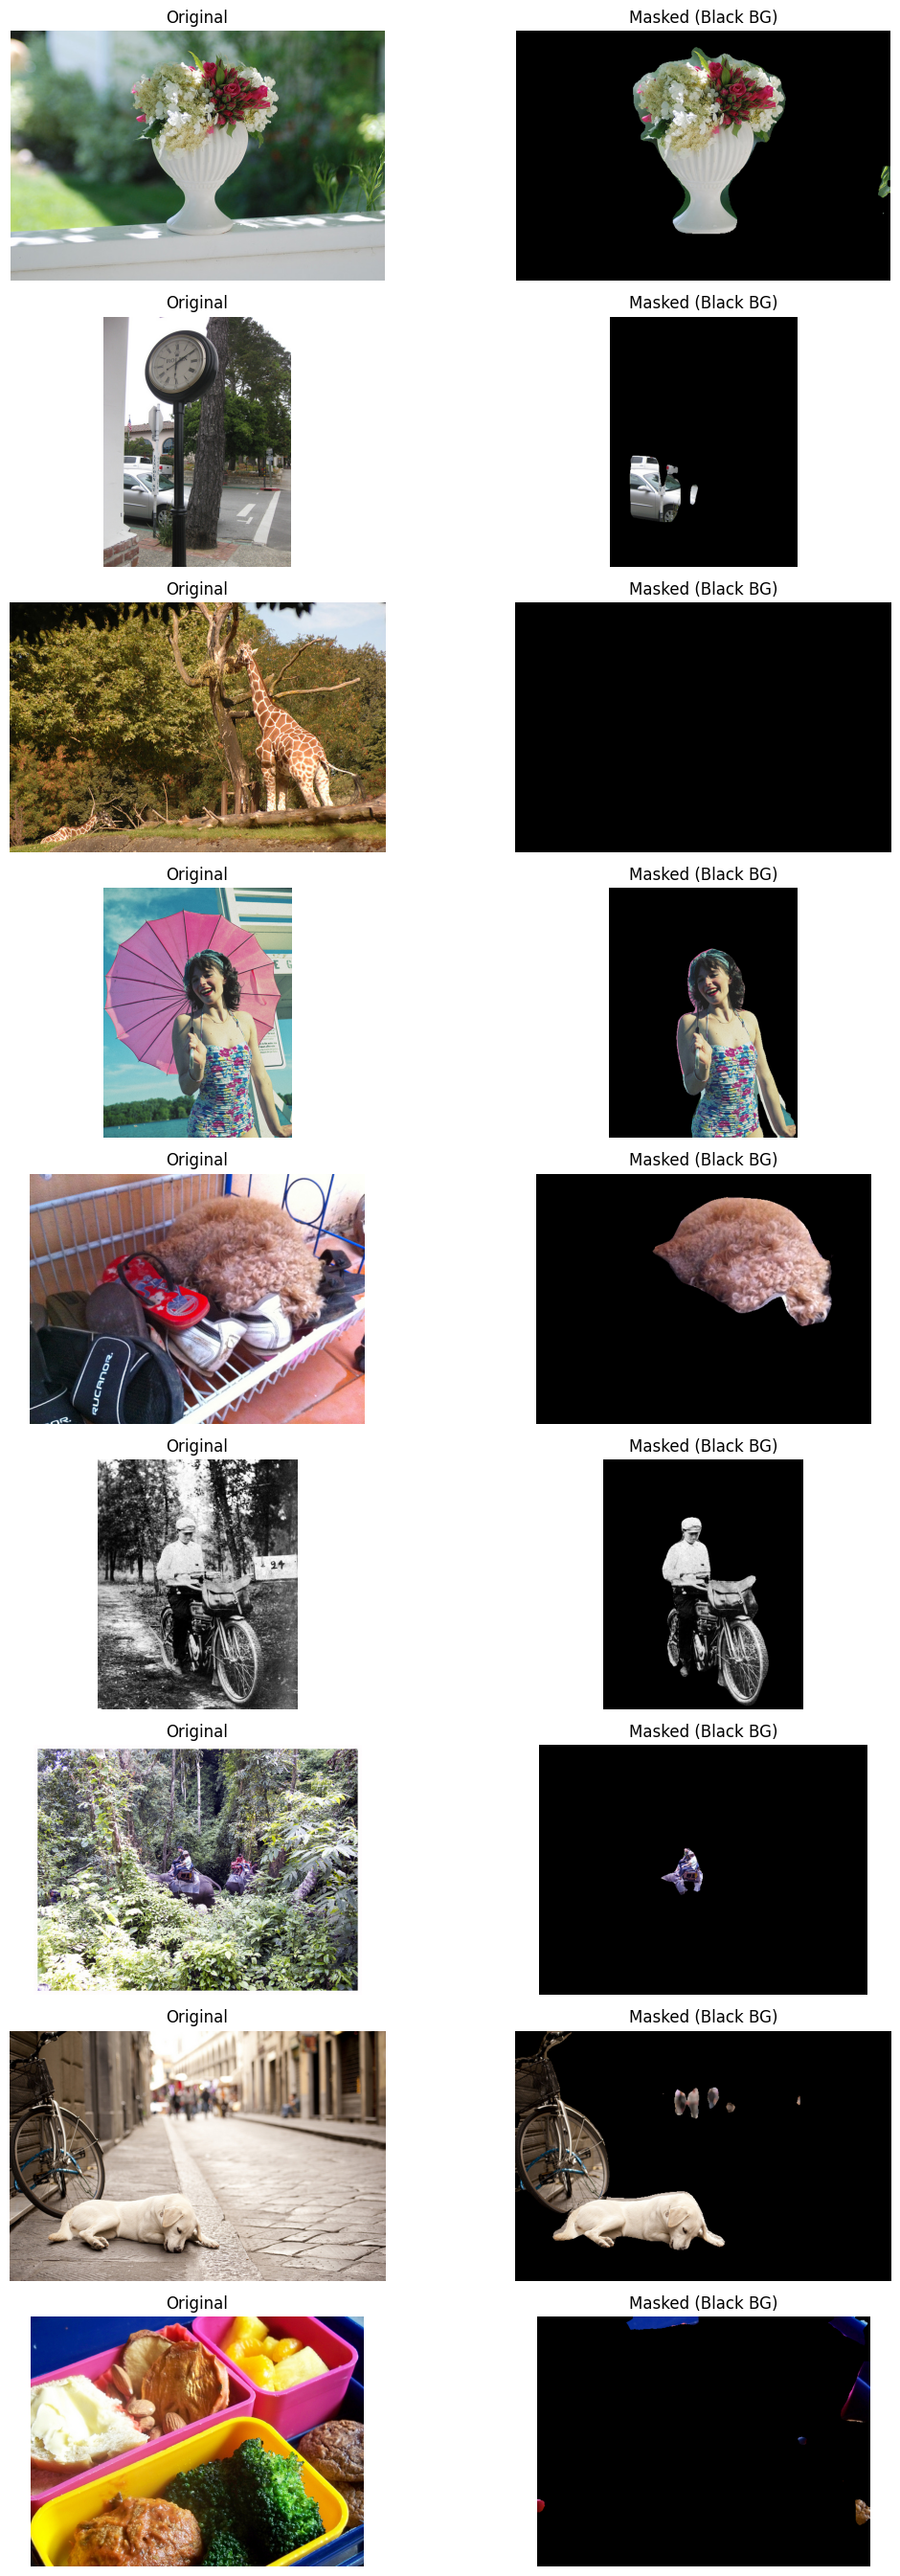


✅ Completed: Only good images processed and displayed.


In [16]:


!pip install torch torchvision pillow matplotlib tqdm --quiet

import os, torch, numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import models, transforms
from tqdm import tqdm

# --- Step 1: Paths ---
IMG_DIR = "/content/COCO_subset/images"
MASK_DIR = "/content/COCO_subset/visualizations"

os.makedirs(MASK_DIR, exist_ok=True)
print(f"📂 Using images from: {IMG_DIR}")

# --- Step 2: Model setup ---
device = "cuda" if torch.cuda.is_available() else "cpu"
model = models.segmentation.deeplabv3_resnet101(weights="COCO_WITH_VOC_LABELS_V1").to(device).eval()

preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# --- Step 3: Helper: safely open image ---
def safe_open(path):
    try:
        img = Image.open(path).convert("RGB")
        return img
    except Exception:
        return None

# --- Step 4: Mask function ---
def create_black_background(img):
    tensor = preprocess(img).unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(tensor)['out'][0]
    mask = output.argmax(0).byte().cpu().numpy()
    img_np = np.array(img)
    img_np[mask == 0] = [0, 0, 0]
    return Image.fromarray(img_np)

# --- Step 5: Collect valid images ---
all_imgs = [f for f in os.listdir(IMG_DIR) if f.lower().endswith((".jpg", ".jpeg", ".png"))]
valid_imgs = []
for f in all_imgs:
    if safe_open(os.path.join(IMG_DIR, f)) is not None:
        valid_imgs.append(f)

if not valid_imgs:
    raise FileNotFoundError

sample_imgs = valid_imgs[:10]
print(f"{len(sample_imgs)} valid images selected for masking.\n")

# --- Step 6: Process and display ---
fig, axes = plt.subplots(len(sample_imgs), 2, figsize=(12, len(sample_imgs)*3))
if len(sample_imgs) == 1: axes = [axes]

for i, img_name in enumerate(tqdm(sample_imgs, desc="Processing Valid Images")):
    img_path = os.path.join(IMG_DIR, img_name)
    img = safe_open(img_path)
    if img is None:
        continue
    masked = create_black_background(img)

    axes[i][0].imshow(img)
    axes[i][0].set_title("Original")
    axes[i][0].axis("off")

    axes[i][1].imshow(masked)
    axes[i][1].set_title("Masked (Black BG)")
    axes[i][1].axis("off")

    masked.save(os.path.join(MASK_DIR, img_name))

plt.tight_layout()
plt.show()

print("\n Completed: Only good images processed and displayed.")
